In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('/content/power_nap_vs_coffee_effectiveness_dataset.csv')
df.head()

,participant_id,age,occupation,sleep_hours_previous_night,intervention_type,intervention_duration_minutes,alertness_score_before,alertness_score_after,productivity_rating,mood_rating,side_effects
0,1,24,Working Professional,5.4,Power Nap,15,62,77,5,10,Grogginess
1,2,37,Student,5.6,Power Nap,30,67,83,6,5,NaN
2,3,32,Working Professional,4.4,Coffee,30,44,52,2,5,Anxiety
3,4,28,Student,6.9,Coffee,30,59,70,4,6,Crash
4,5,25,Working Professional,4.7,Power Nap,30,40,58,3,6,Grogginess


In [15]:
df = df.drop(columns=["side_effects"], errors='ignore')
df = df.drop(columns=["occupation"], errors='ignore')
df = df.drop_duplicates()
df.isna().sum()
df.duplicated().sum()

np.int64(0)

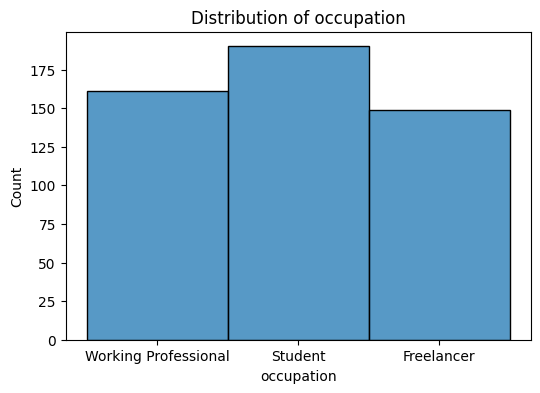

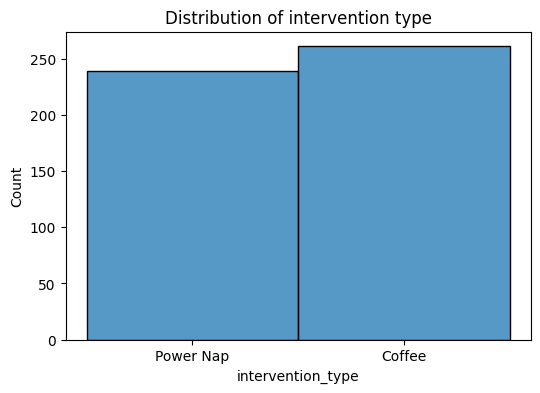

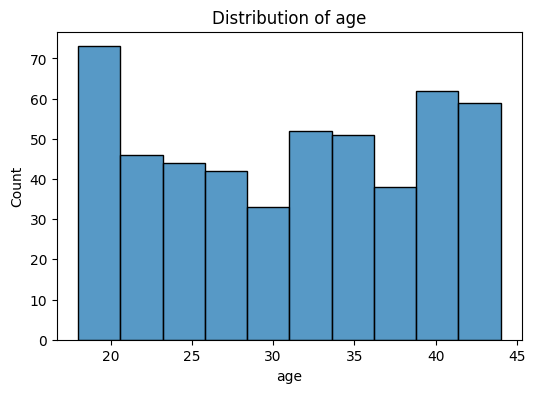

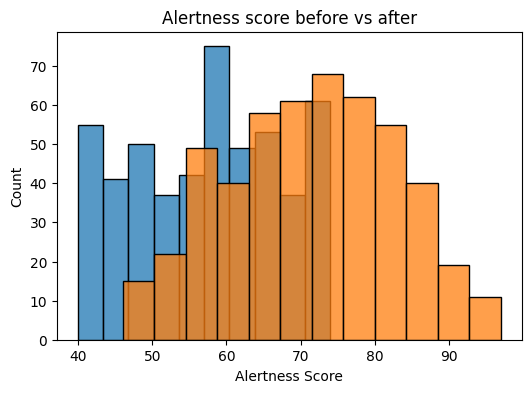

In [3]:
plt.figure(figsize=(6, 4))
sns.histplot(data = df, x = 'occupation')
plt.title('Distribution of occupation')
plt.show()

# Really good distrbution of occupation
plt.figure(figsize=(6, 4))
sns.histplot(data = df, x = 'intervention_type')
plt.title('Distribution of intervention type')
plt.show()
# A really good balance of the two categories

plt.figure(figsize=(6, 4))
sns.histplot(data = df, x = 'age')
plt.title('Distribution of age')
plt.show()
# good enough even distribution of the important ages

plt.figure(figsize=(6, 4))
sns.histplot(data = df, x = 'alertness_score_before')
sns.histplot(data = df, x = 'alertness_score_after')
plt.title('Alertness score before vs after')
plt.xlabel('Alertness Score')
plt.show()
# goes from even to bell curved

In [16]:
y = df['alertness_score_after']
X = df.drop(columns=['alertness_score_after', 'participant_id'])

X_encoded = pd.get_dummies(X, columns=['intervention_type'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Creating metrics
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

coefficients = pd.DataFrame({'Feature': X_encoded.columns, 'Coefficient': model.coef_})
intercept_df = pd.DataFrame([{'Feature': 'Intercept', 'Coefficient': model.intercept_}])
coefficients = pd.concat([intercept_df, coefficients], ignore_index=True)
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Printing metrics
print("Linear Regression Coefficients for Alertness Score Post Treatment:")
print(coefficients)
print(f"\nMean Squared Error (MSE) for Alertness Score: {mse:.2f}")
print(f"Root Mean Squared Error (RMSE) for Alertness Score: {rmse:.2f}")
print(f"R-squared (R2) for Alertness Score: {r2:.2f}")

Linear Regression Coefficients for Alertness Score Post Treatment:
                         Feature  Coefficient
0                      Intercept     7.017305
7    intervention_type_Power Nap     6.333254
4         alertness_score_before     1.033065
6                    mood_rating     0.115951
2     sleep_hours_previous_night     0.086055
5            productivity_rating     0.038881
1                            age     0.028219
3  intervention_duration_minutes    -0.014198

Mean Squared Error (MSE) for Alertness Score: 17.61
Root Mean Squared Error (RMSE) for Alertness Score: 4.20
R-squared (R2) for Alertness Score: 0.87


In [19]:
y = df['mood_rating']
X = df.drop(columns=['mood_rating', 'participant_id'])

X_encoded = pd.get_dummies(X, columns=['intervention_type'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Creating metrics
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

coefficients = pd.DataFrame({'Feature': X_encoded.columns, 'Coefficient': model.coef_})
intercept_df = pd.DataFrame([{'Feature': 'Intercept', 'Coefficient': model.intercept_}])
coefficients = pd.concat([intercept_df, coefficients], ignore_index=True)
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Printing metrics
print("Linear Regression Coefficients for Mood Ratings Post Treatment:")
print(coefficients)
print(f"\nMean Squared Error (MSE) for Mood Ratings: {mse:.2f}")
print(f"Root Mean Squared Error (RMSE) for Mood Ratings: {rmse:.2f}")
print(f"R-squared (R2) for Mood Ratings: {r2:.2f}")

Linear Regression Coefficients for Mood Ratings Post Treatment:
                         Feature  Coefficient
0                      Intercept     5.820176
5          alertness_score_after     0.062806
2     sleep_hours_previous_night     0.003946
6            productivity_rating     0.002950
1                            age    -0.005328
3  intervention_duration_minutes    -0.027051
4         alertness_score_before    -0.066175
7    intervention_type_Power Nap    -0.617534

Mean Squared Error (MSE) for Mood Ratings: 8.41
Root Mean Squared Error (RMSE) for Mood Ratings: 2.90
R-squared (R2) for Mood Ratings: -0.01


In [18]:
y = df['productivity_rating']
X = df.drop(columns=['productivity_rating', 'participant_id'])

X_encoded = pd.get_dummies(X, columns=['intervention_type'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Creating metrics
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

coefficients = pd.DataFrame({'Feature': X_encoded.columns, 'Coefficient': model.coef_})
intercept_df = pd.DataFrame([{'Feature': 'Intercept', 'Coefficient': model.intercept_}])
coefficients = pd.concat([intercept_df, coefficients], ignore_index=True)
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Printing metrics
print("Linear Regression Coefficients for Productivity Ratings Post Treatment:")
print(coefficients)
print(f"\nMean Squared Error (MSE) for Productivity Ratings: {mse:.2f}")
print(f"Root Mean Squared Error (RMSE) for Productivity Ratings: {rmse:.2f}")
print(f"R-squared (R2) for Productivity Ratings: {r2:.2f}")

Linear Regression Coefficients for Productivity Ratings Post Treatment:
                         Feature  Coefficient
0                      Intercept     6.836435
5          alertness_score_after     0.019483
7    intervention_type_Power Nap     0.018127
6                    mood_rating     0.002729
1                            age    -0.003443
4         alertness_score_before    -0.020625
3  intervention_duration_minutes    -0.047009
2     sleep_hours_previous_night    -0.075721

Mean Squared Error (MSE) for Productivity Ratings: 9.03
Root Mean Squared Error (RMSE) for Productivity Ratings: 3.01
R-squared (R2) for Productivity Ratings: -0.01


In [34]:
# Logistic Regression
y = df['intervention_type']
X = df.drop(columns=['intervention_type', 'participant_id'])

y_encoded = y.map({'Coffee': 0, 'Power Nap': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.20, random_state=42)

lr_model = LogisticRegression(random_state=42, solver='liblinear')
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred_lr)
report = classification_report(y_test, y_pred_lr, target_names=['Coffee', 'Power Nap'])
conf_matrix = confusion_matrix(y_test, y_pred_lr)

print("Logistic Regression Classifier for Predicting Intervention Type:")
print(f"\nAccuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report)

print("\nConfusion Matrix:")
print(conf_matrix)

Logistic Regression Classifier for Predicting Intervention Type:

Accuracy: 0.69

Classification Report:
              precision    recall  f1-score   support

      Coffee       0.67      0.68      0.67        47
   Power Nap       0.71      0.70      0.70        53

    accuracy                           0.69       100
   macro avg       0.69      0.69      0.69       100
weighted avg       0.69      0.69      0.69       100


Confusion Matrix:
[[32 15]
 [16 37]]


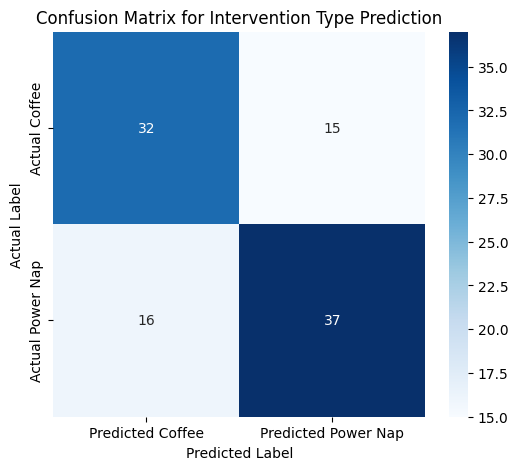

In [35]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Coffee', 'Predicted Power Nap'],
            yticklabels=['Actual Coffee', 'Actual Power Nap'])
plt.title('Confusion Matrix for Intervention Type Prediction')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [22]:
# Gradient Boosting
y = df['alertness_score_after']
X = df.drop(columns=['alertness_score_after', 'participant_id', 'productivity_rating', 'mood_rating'])

X_encoded = pd.get_dummies(X, columns=['intervention_type'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)


y_pred_gbr = gbr_model.predict(X_test)

# Metrics
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting Regressor for Alertness Score Post Treatment:")
print(f"Mean Squared Error (MSE): {mse_gbr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gbr:.2f}")
print(f"R-squared (R2): {r2_gbr:.2f}")

# Feature Importances
feature_importances = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': gbr_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)

Gradient Boosting Regressor for Alertness Score Post Treatment:
Mean Squared Error (MSE): 20.63
Root Mean Squared Error (RMSE): 4.54
R-squared (R2): 0.84

Feature Importances:
                         Feature  Importance
3         alertness_score_before    0.872089
4    intervention_type_Power Nap    0.084102
1     sleep_hours_previous_night    0.022586
0                            age    0.015733
2  intervention_duration_minutes    0.005489


Conclusion: This dataset is one of before and after. The linear regression model revealed the different factors, especially the factor of whether or not nap or coffee would be the most effective in increasing the target variable’s strength which includes: Alertness_Score_After, Mood_Rating, and Productivity_score. Among the three, Alertness_Score_After exuded the most promising metrics of linear regression, having a R-Squared score of 0.87. The other target variables yielded unfavorable results concerning the degree of influence the intervention_type had on the result. The logistic regression further backed this as it showed a moderate accuracy and recall score concerning the prediction of the intervention_type based on the other factors. The Gradient boosting showed an even more revealing sign, that the Alertness_Score_Before is the main constituting factor towards Awareness_Score_After. That is to be expected, but at second more influential is the Intervention_Type between coffee and nap, although significantly less so compared to Alertness_Score_Before. However, all of these points to the apparent lack of major significant improvements of either over the other, as napping does have a slight edge over coffee in the Awareness_Score_After, but it is not too significant around a 6 point increase over coffee by the Linear Regression model.